In [3]:
import pandas as pd

#library for data cleaning
import re
import string
import nltk
from unidecode import unidecode
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roy.noviantho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roy.noviantho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
df = pd.read_csv('C:\Challenge gold\projectgold\data.csv', encoding='latin-1')
df = pd.DataFrame(df['Tweet'])
df


,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...
...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...
13165,USER Kasur mana enak kunyuk'
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167,USER USER USER USER Bom yang real mudah terdet...


In [5]:
#case fold 
df['Tweet_Clean'] = df['Tweet'].str.lower()

#replace ascii
def replace_ascii(text):
  #text = text.encode().decode('unicode_escape')
  #text = bytes(text, 'latin').decode('utf-8') 
  return re.sub(r"\\x[A-Za-z0-9./]+", "",unidecode(text))

df['Tweet_Clean'] = df['Tweet_Clean'].apply(replace_ascii)

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['Tweet_Clean'] = df['Tweet_Clean'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['Tweet_Clean'] = df['Tweet_Clean'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['Tweet_Clean']= df['Tweet_Clean'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['Tweet_Clean']= df['Tweet_Clean'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['Tweet_Clean'] = df['Tweet_Clean'].apply(remove_whitespace_multiple)

# remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Tweet_Clean']= df['Tweet_Clean'].apply(remove_single_char)

#hapus url
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df['Tweet_Clean'] = df['Tweet_Clean'].apply(remove_urls)

<h2> TOKENIZE </h2>

In [6]:
#TOKENIZE
def tokenizer(text):
    return word_tokenize(text)
df['Tweet_Tokens'] = df['Tweet_Clean'].apply(tokenizer)

<H2> STOPWORDS </H2>

In [7]:
#STOPWORDS
from nltk.corpus import stopwords
dump_stopwords = stopwords.words('indonesian')
dump_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah','gw'])
list_stopwords = set(dump_stopwords)
def stopwords_removal(text):
    return [word for word in text if word not in list_stopwords]
df['Tweet_Stop'] = df['Tweet_Tokens'].apply(stopwords_removal)

<h2> NORMALISASI </h2>

In [9]:
normalized_word = pd.read_csv("new_kamusalay.csv", encoding = 'latin')

normalized_word_dict = {}
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(text):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in text]
    #return [word for word in text if word not in list_stopwords]
df['Tweet_Normalized'] = df['Tweet_Stop'].apply(normalized_term)

<h2> FINAL STEP CLEAN <h2>

In [10]:
def clean_text(text):
    komentar = " "
    return (komentar.join(text))
df['Final'] = df['Tweet_Normalized'].apply(clean_text)

In [11]:
df_tweet = pd.DataFrame().assign(Before=df['Tweet'], After=df['Final'])
df_tweet

,Before,After
0,- disaat semua cowok berusaha melacak perhatia...,di saat cowok berusaha melacak perhatian gue k...
1,RT USER: USER siapa yang telat ngasih tau elu?...,pengguna pengguna telat memberi eluedan sarap ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang berpikir percaya tuhan jatuh berkalikal...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,pengguna pengguna ku matamu sipit dilihat
4,USER USER Kaum cebong kapir udah keliatan dong...,pengguna pengguna kaum cebong kafir sudah keli...
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,pengguna berbicara ndasmu congor kamu sekate a...
13165,USER Kasur mana enak kunyuk',pengguna kasur enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,pengguna hati hati bisu bosan duh
13167,USER USER USER USER Bom yang real mudah terdet...,pengguna pengguna pengguna pengguna bom real m...


<H2> COUNT MOST ABUSIVE WORD </H2>

In [12]:
from collections import Counter
all_word = Counter(" ".join(df_tweet["After"]).split())
#example to access counter with specific word
all_word['alay']

22

In [14]:
abusive_df = pd.read_csv('abusive.csv', encoding = 'utf-8')
abusive_df

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [16]:
list_abusive_word = abusive_df['ABUSIVE'].values.tolist()
list_abusive_word

['alay',
 'ampas',
 'buta',
 'keparat',
 'anjing',
 'anjir',
 'babi',
 'bacot',
 'bajingan',
 'banci',
 'bandot',
 'buaya',
 'bangkai',
 'bangsat',
 'bego',
 'bejat',
 'bencong',
 'berak',
 'bisu',
 'celeng',
 'jancuk',
 'bodoh',
 'berengsek',
 'budek',
 'burik',
 'jamban',
 'cocot',
 'congor',
 'culun',
 'cupu',
 'dongok',
 'dungu',
 'edan',
 'tai',
 'ngewe',
 'geblek',
 'gembel',
 'gila',
 'goblok',
 'iblis',
 'idiot',
 'jablay',
 'jembud',
 'jembut',
 'jijik',
 'kacrut',
 'kafir',
 'modar',
 'kampang',
 'kampret',
 'kampungan',
 'kimak',
 'kontol',
 'kunti',
 'tuyul',
 'kunyuk',
 'mampus',
 'memek',
 'monyet',
 'najis',
 'nete',
 'ngentot',
 'noob',
 'pecun',
 'perek',
 'sampah',
 'sarap',
 'setan',
 'silit',
 'bokong',
 'sinting',
 'sompret',
 'sontoloyo',
 'terkutuk',
 'titit',
 'pantat',
 'tolol',
 'udik',
 'antek',
 'asing',
 'ateis',
 'sitip',
 'autis',
 'picek',
 'ayam kampus',
 'bani kotak',
 'bispak',
 'bisyar',
 'bokep',
 'bong',
 'cacat',
 'cct',
 'cebong',
 'taplak',
 'cu

In [17]:
dict_abusive_total = {}
#get all values 
for enum in list_abusive_word:
  dict_abusive_total[enum] = all_word[enum]
  #print(enum, "=",all_word[enum])

In [18]:
count_abusive = Counter(dict_abusive_total)
top_10 = count_abusive.most_common(10)
df_top_10 = pd.DataFrame(top_10, columns = ['Word','Total'])
df_top_10

,Word,Total
0,asing,695
1,komunis,681
2,cebong,512
3,rezim,358
4,kafir,354
5,anjing,279
6,tai,269
7,antek,234
8,onta,228
9,goblok,210


Text(0.5, 0, 'Total')

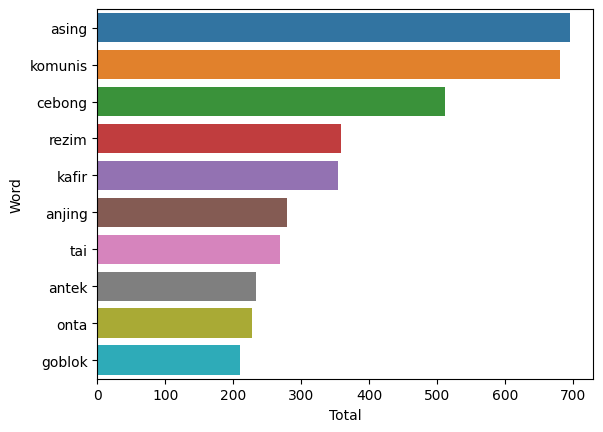

In [19]:
ax = sns.barplot(x='Total', y='Word', data=df_top_10)
ax.set_xlabel('Total')

<h2> WORD CLOUD </H2>

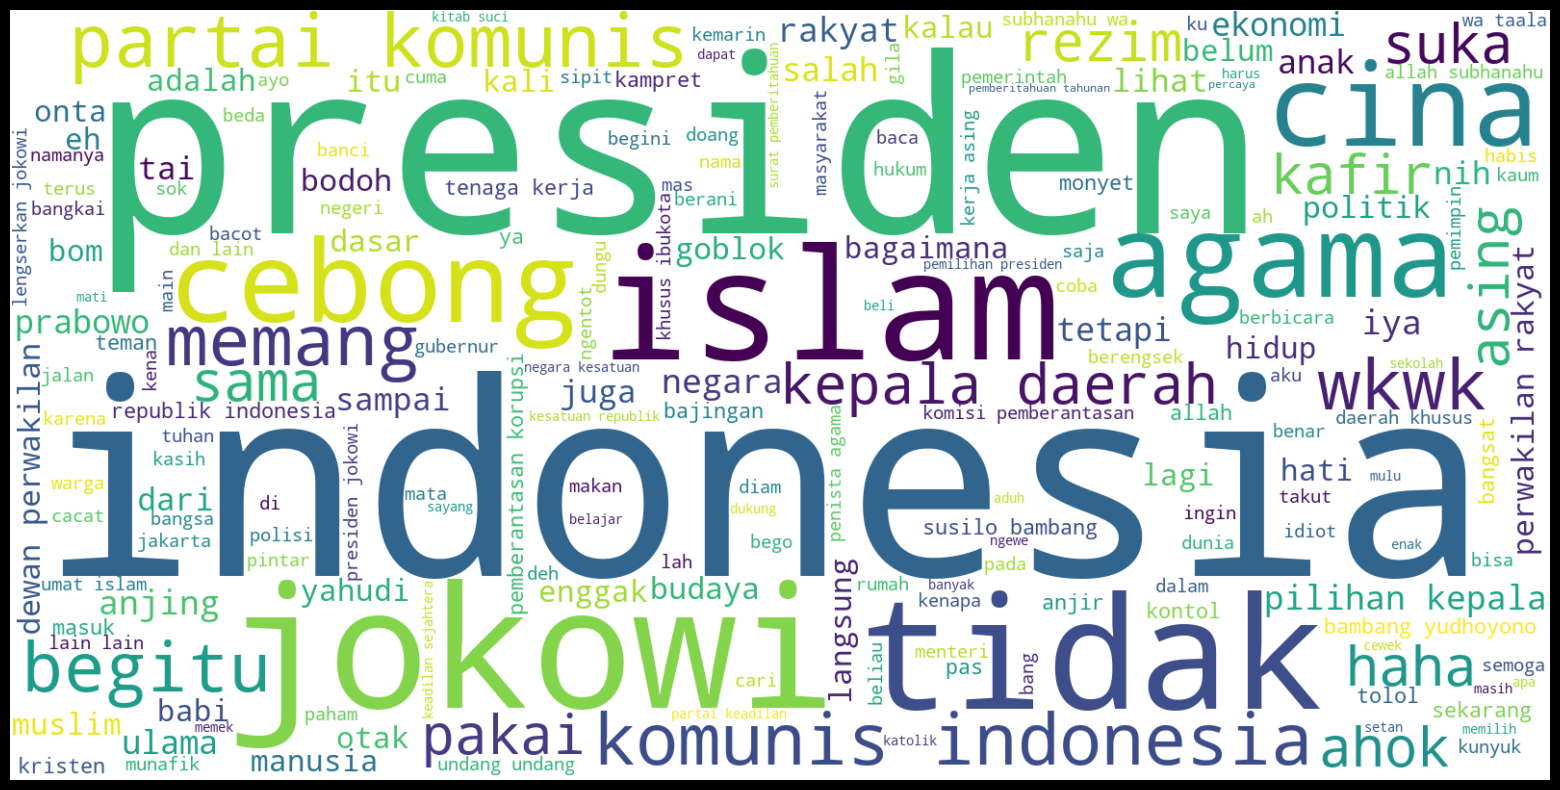

In [21]:
from wordcloud import WordCloud, STOPWORDS
text =  " ".join(review for review in df_tweet.After.astype(str))
stopwords = set(STOPWORDS)
stopwords.update(["pengguna", "kamu","sudah","resource","locator","gue","orang","uniform","banget","kayak"])
wordcloud = WordCloud(stopwords=stopwords, width=1600, height=800,background_color="white").generate(text)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()